## Import Libraries

In [3]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 
from torch.utils.data import DataLoader 
import torchvision.datasets as datasets 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 

## Build Model

In [4]:
class Neural_MNIST(nn.Module):
     def __init__(self, num_input, num_classes):
         super(Neural_MNIST, self).__init__()
         self.input_layer = nn.Linear(num_input, 32)
         self.first_hidden = nn.Linear(32, 32)
         self.second_hidden = nn.Linear(32, 32)
         self.third_hidden = nn.Linear(32, 32)
         self.output_layer = nn.Linear(32, num_classes)

         self.tanh = nn.Tanh()
         self.sigmoid = nn.Sigmoid()
         self.softmax = nn.Softmax()

     def forward(self, x):
          x = self.sigmoid( self.input_layer(x) )
          x = self.sigmoid( self.first_hidden(x) )
          x = self.sigmoid(self.second_hidden(x))
          x = self.sigmoid(self.third_hidden(x))

          x = self.output_layer(x)
          x = F.softmax(x, dim=1)
          return x

## Use Device and Instantiate Model

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

epochs, input_size, output_size = 20, 784, 10
model = Neural_MNIST(input_size, output_size).to(device)

## Download Data and Save it in a folder named data_1

In [6]:
train_dataset = datasets.FashionMNIST(root='data_1', download=True, train=True, transform=transforms.ToTensor())
test_dataset  = datasets.FashionMNIST(root='data_1', download=True, train=False, transform=transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data_1\FashionMNIST\raw\train-images-idx3-ubyte.gz to data_1\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data_1\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data_1\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data_1\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data_1\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data_1\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data_1\FashionMNIST\raw



## Load the Data

In [7]:
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset,  batch_size=32, shuffle=True)

## Criterion and Optimizer

In [8]:
optimizer = optim.Adam(model.parameters(), lr=0.0005)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, 0.90)

## Train the Model

In [9]:
all_train_losses, all_test_losses = [], [] 

for epoch in range(epochs):
     mini_loss = 0
     for index, (features, targets) in enumerate(train_loader): 

          features = features.to(device=device)
          targets  = targets.to(device=device)

          # print(features.shape)
          features = features.view(features.shape[0], -1)
          # print(features.shape)

          optimizer.zero_grad()
          prediction = model.forward(features)
          train_loss = criterion(prediction, targets)
          train_loss.backward()
          optimizer.step()

          mini_loss += train_loss.item()
     
     mini_loss_average = mini_loss/len(train_loader)
     all_train_losses.append(mini_loss_average)


     model.eval()
     mini_test_loss = 0
     with torch.no_grad():
          for ind, (x_train, y_train) in enumerate(test_loader):
               x_train = x_train.to(device=device) 
               y_train = y_train.to(device=device)

               x_train = x_train.view(x_train.shape[0], -1)

               test_pred = model.forward(x_train)
               test_loss = criterion(test_pred, y_train) 
               mini_test_loss += test_loss.item()
     
     mini_test_loss_average = mini_test_loss/len(test_loader)
     all_test_losses.append(mini_test_loss_average)
     model.train()

     print(f'{epoch+1 :3} / {epochs:3}    |   Train Loss :   {mini_loss_average :.6f}    |  Test Loss :  {mini_test_loss_average:.6f}')

  1 /  20    |   Train Loss :   2.198166    |  Test Loss :  2.126586
  2 /  20    |   Train Loss :   2.090537    |  Test Loss :  2.053429
  3 /  20    |   Train Loss :   2.046567    |  Test Loss :  2.043791
  4 /  20    |   Train Loss :   1.984564    |  Test Loss :  1.911730
  5 /  20    |   Train Loss :   1.891306    |  Test Loss :  1.884226
  6 /  20    |   Train Loss :   1.867416    |  Test Loss :  1.837651
  7 /  20    |   Train Loss :   1.792720    |  Test Loss :  1.773570
  8 /  20    |   Train Loss :   1.750548    |  Test Loss :  1.748195
  9 /  20    |   Train Loss :   1.735432    |  Test Loss :  1.736278
 10 /  20    |   Train Loss :   1.728108    |  Test Loss :  1.734685
 11 /  20    |   Train Loss :   1.722999    |  Test Loss :  1.727934
 12 /  20    |   Train Loss :   1.719589    |  Test Loss :  1.726832
 13 /  20    |   Train Loss :   1.714358    |  Test Loss :  1.717243
 14 /  20    |   Train Loss :   1.692408    |  Test Loss :  1.694480
 15 /  20    |   Train Loss :   1.

## Plot The Results

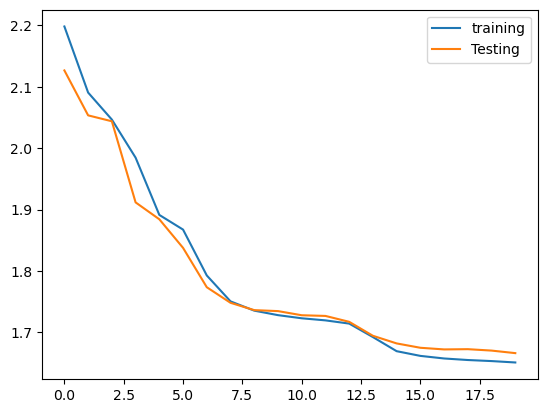

In [10]:
plt.plot(all_train_losses, label='training')
plt.plot(all_test_losses,  label='Testing')
plt.legend() 
plt.show()